In [21]:
import pandas as pd

# تحميل البيانات
df = pd.read_csv('master.csv')

# نظرة عامة
print(df.shape)        # عدد الصفوف والأعمدة
print(df.columns)      # أسماء الأعمدة
print(df.dtypes)       # نوع البيانات بكل عمود
df.head()              # عرض أول خمس صفوف


(27820, 12)
Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [22]:
# القيم المفقودة
print(df.isnull().sum())

# البيانات المكررة
print(df.duplicated().sum())


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64
0


In [23]:
# كم نسبة القيم المفقودة فيه؟
missing_ratio = df['HDI for year'].isnull().mean()
print(f'HDI missing ratio: {missing_ratio:.2%}')


HDI missing ratio: 69.94%


In [24]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].astype(str).str.replace(',', '').astype(float)

In [25]:

#  حذف الأعمدةء
df.drop('HDI for year', axis=1, inplace=True)
df.drop('country-year', axis=1, inplace=True)
df['suicide_rate'] = df['suicides_no'] / df['population'] * 100_000
# التأكد من النتيجة
print(df.columns)
print(df.dtypes)
df.head()

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation', 'suicide_rate'],
      dtype='object')
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
 gdp_for_year ($)     float64
gdp_per_capita ($)      int64
generation             object
suicide_rate          float64
dtype: object


,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,suicide_rate
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X,6.711409
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent,5.194805
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X,4.832585
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation,4.587156
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers,3.281079


In [ ]:
# تعديل أسماء الأعمدة 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides100k_pop,gdp_for_year_,gdp_per_capita_,generation,suicide_rate
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X,6.711409
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent,5.194805
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X,4.832585
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation,4.587156
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers,3.281079


In [27]:
import pandas as pd
age_order = [
    '5-14 years',
    '15-24 years',
    '25-34 years',
    '35-54 years',
    '55-74 years',
    '75+ years'
]

df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)
df.head()
age_summary = df.groupby('age',observed=False)['suicides_no'].sum()
print(age_summary)


age
5-14 years       52264
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64


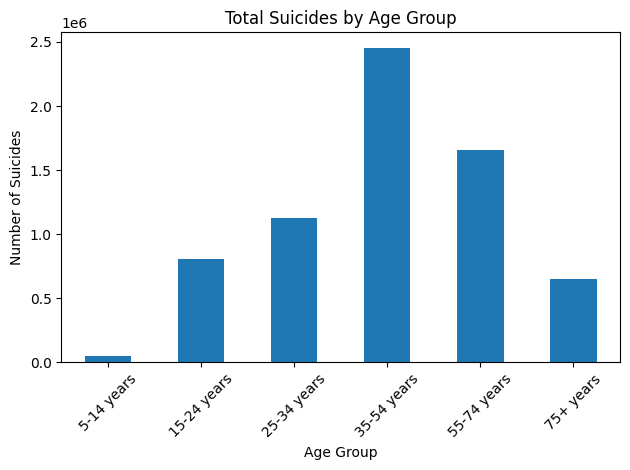

In [28]:
import matplotlib.pyplot as plt

age_summary.plot(kind='bar', title='Total Suicides by Age Group', ylabel='Number of Suicides', xlabel='Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
